In [2]:
import matplotlib
import matplotlib.pyplot as pl
import matplotlib.colors as colors
import numpy as np
import scipy as sc
import scipy.odr as odr
import scipy.optimize as op

# Scipy ODR

[ 0.73499294  3.16446753  7.10628611 10.88280284  9.31003153 11.85019285]
[0.76044547 1.38961218 1.72945714 1.11316919 1.77514833 0.25340489]
--- 0.0007724761962890625 seconds ---
[1.03094241 2.44465453]
[1.26251493 0.41523793]
--- 0.0060482025146484375 seconds ---
[1.39528616 2.11097581]
[1.03091415 0.22533569]


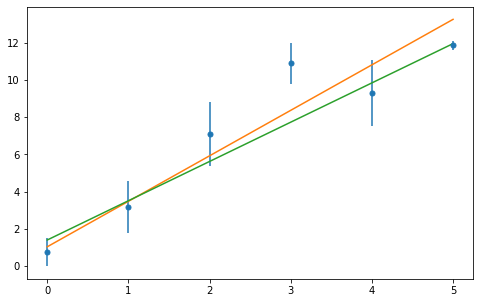

In [4]:
#define fit function
def lin(x,*p):
    return p[0]+p[1]*x

#create fake data with y errors only
x=np.array([0,1,2,3,4,5])
y=x*2+5*np.random.rand(6)
print(y)
y_err=2-2*np.random.rand(6)
print(y_err)


#fit with odr
def lin_odr(p,x):
    return lin(x,*p)
import time
start_time = time.time()
func=sc.odr.Model(lin_odr)
#need to take very small error, taking x error as zero doesn't work
mydata=sc.odr.RealData(x,y, sy=y_err)
myodr=sc.odr.ODR(mydata, func, beta0=[2,2])
myoutput=myodr.run()
print("--- %s seconds ---" % (time.time() - start_time))
print(myoutput.beta)
print(myoutput.sd_beta)

pl.figure(figsize=(8,5))
pl.errorbar(x,y,yerr=y_err, marker='.',markersize=10, linestyle='')
x_f, y_f = np.linspace(0,5,1000), lin(np.linspace(0,5,1000),*myoutput.beta)
pl.plot(x_f, y_f)
start_time = time.time()
popt, pconv=op.curve_fit(lin, x, y,p0=[1,1], sigma=y_err,maxfev=10**6)
print("--- %s seconds ---" % (time.time() - start_time))
print(popt)
print(np.sqrt(pconv.diagonal()))

x_f, y_f = np.linspace(0,5,1000), lin(np.linspace(0,5,1000),*popt)
pl.plot(x_f, y_f)


ODR and Chi2 yield different results, therefore one should only use ODR if x-errors are present. If the data only features y-errors one should use the standard Chi2 fit.